<h1>Introduction to SymPy</h1>



This is to present a short introduction to symbolic mathematics in Python using SymPy


Following the flow of : http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html

# Table of Contents
 <p><div class="lev1"><a href="#Introduction-to-SymPy"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to SymPy</a></div><div class="lev2"><a href="#Symbols"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Symbols</a></div><div class="lev2"><a href="#Substitute"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Substitute</a></div><div class="lev2"><a href="#Strings--&gt;-Sympy-Expressions"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Strings -&gt; Sympy Expressions</a></div><div class="lev2"><a href="#evalf()"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>evalf()</a></div><div class="lev2"><a href="#Lambdify"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Lambdify</a></div><div class="lev2"><a href="#Simplification"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Simplification</a></div><div class="lev3"><a href="#simplify()"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>simplify()</a></div><div class="lev3"><a href="#factor()-&amp;-factor_list()"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>factor() &amp; factor_list()</a></div><div class="lev3"><a href="#expand()"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>expand()</a></div><div class="lev3"><a href="#collect()-and-coeff()"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>collect() and coeff()</a></div><div class="lev3"><a href="#cancel()"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>cancel()</a></div><div class="lev3"><a href="#apart()---Partial-Fraction-Decomposition"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>apart() - Partial Fraction Decomposition</a></div><div class="lev2"><a href="#Trigonometric-Simplification"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Trigonometric Simplification</a></div><div class="lev3"><a href="#trigsimp()"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>trigsimp()</a></div><div class="lev3"><a href="#expand_trig()"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>expand_trig()</a></div><div class="lev2"><a href="#Powers"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Powers</a></div><div class="lev3"><a href="#Symbols-and-requirements"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Symbols and requirements</a></div><div class="lev3"><a href="#powsimp()"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>powsimp()</a></div><div class="lev3"><a href="#expand_power_exp()-and-expand_power_base()"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>expand_power_exp() and expand_power_base()</a></div><div class="lev3"><a href="#powdenest()"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>powdenest()</a></div>

In [10]:
import sympy as sym
init_printing()  # to get nice \LaTeX output

## Symbols

There are two ways in which a mathematical symbol can be defined:

In [11]:
x = sym.Symbol('x')

In [12]:
x+1

For multiple symbols one can do

In [13]:
y, z = sym.symbols('y z')
y+z+1

In [14]:
x='abc'

In [16]:
expr = x + 'def' ; expr

'abcdef'

## Substitute

In [17]:
x = sym.symbols('x')
expr = x+1
expr

In [20]:
expr.subs(x,1) # should be 2

In [21]:
expr.subs(x,z)


---
The importance of substition is the following

- We can simply evaluate an expression at a point. e.g. for the expression cos(x)+1 we want to know its value when x=0:

In [22]:
expr = cos(x)+1

In [23]:
expr.subs(x,0)

---
- But also is very important that we can substitute a variable with a new expression! This way we can build sequences...e.g. $x^{x^{x^{x}}}$

In [24]:
expr.subs(x, x+y)

In [27]:
expr.subs(x, x**y)


---

**N.B.**
`subs()` returns a **new** expression, i.e. the `expr` is not changed!

---


`subs` is immutable! To perform multiple substitution we use a **list of tuples**:



In [28]:
expr = cos(x)+2*sin(y)+z

In [31]:
expr.subs([(x,1),(y,3), (z,0)])

---

This is very usefull because we can use **list comprehension** for the substitutions!

---

In [33]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [36]:
replacements = [(x**i, y**i) for i in range(5) if i%2==0]  #replace all instances of x that 
                                                           # have even powers with y

In [37]:
expr.subs(replacements)

---


## Strings -> Sympy Expressions

We can use the `sympify()` (** NOT SIMPLIFY **) to convert string to sympy expressions

In [40]:
str_expr = "x**2+3*x+2"

In [42]:
expr = sym.sympify(str_expr)

In [44]:
expr

In [45]:
expr.subs(x,2)

---

## evalf()

Use `evalf()` to evaluate a numerical expression into a **floating** point number:

In [46]:
expr= sqrt(8)

In [47]:
expr

In [51]:
expr.evalf()

In [53]:
expr.evalf(50) #first 50 digits

---

To evaluate an expression with a symbol to a point we can use the `subs` **flag** in `evalf()` using a dictionary : `Symbol: point` 

In [55]:
expr = cos(2*x)
expr

In [56]:
expr.evalf(subs={x:0.2})

In [58]:
cos(2*0.2) #it works

---

There are roundoff errors smaller than the desired precision. Such numbers can be cut using the `chop` **flag** in `eval()`:

In [59]:
one = cos(1)**2 + sin(1)**2

In [60]:
(one-1).evalf()

In [61]:
(one-1).evalf(chop=True)

---

## Lambdify

`lambdify()` is used to convert a SymPy expression to another library (usually NumPy). `lambdify()` acts as a lambda function but also converting the SymPy expressions to a another numerical library.

For example if we want to use the `subs` flag of the `evalf()` function to evaluate the function at 1000 points, then we can use numpy and lambdify...

In [62]:
import numpy as np

In [68]:
a = np.arange(100)

In [69]:
expr = sin(x)

In [74]:
f = lambdify(x, expr, "numpy")  # takes an argument x=x0 and returns the expr(x0)

In [75]:
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918,  0.98662759,  0.39592515, -0.55878905,
       -0.99975517, -0.521551  ,  0.43616476,  0.99287265,  0.63673801,
       -0.30481062, -0.96611777, -0.7391807 ,  0.1673557 ,  0.92002604,
        0.82682868, -0.02655115, -0.85551998, -0.89792768, -0.11

---

## Simplification

Functions that are used to simplify expressions

### simplify()

In [77]:
simplify(cos(x)**2 + sin(x)**2)

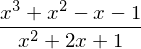

In [79]:
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1);
expr

In [80]:
simplify(expr)

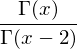

In [83]:
expr = gamma(x)/gamma(x-2); expr   ## gamma(x) := Gamma functions

In [84]:
simplify (expr)

---

### factor() & factor_list()

`factor` is used on polynomials with rational coefficients and factors it inot irreducible factors over the rational numbers


In [88]:
expr = x**3 - x**2 + x- 1;
expr

In [89]:
factor(expr)

In [90]:
expr = x**2*z + 4*x*y*z + 4*y**2*z; expr

In [91]:
factor (expr)

In [93]:
factor_list(expr)

---

### expand()

`expand()` is used to make an expression bigger. The opposite of `factor()`.

In [96]:
expr = (x+1)**2;
expr

In [97]:
expand(expr)

---

### collect() and coeff()

`collect()` is used to collect common powers of a term

In [98]:
expr = x*y +x-3+2*x**2 - z*x**2 + x**3; expr

In [99]:
cl = collect(expr, x)

In [100]:
cl

---

Very usefull when combined with the `coeff()` function that fives the coefficients of a symbol in the expression:


In [101]:
expr

In [102]:
expr.coeff(x,2)

In [103]:
expr.coeff(y, 1)

In [105]:
cl.coeff(x,3)

In [106]:
cl.coeff(x,2)

---


### cancel()

`cancel()` is used to take any rational function and put it into standard canonical form.

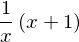

In [107]:
cancel((x**2+2*x+1)/(x**2+x))

In [108]:
expr = 1/x + (3*x/2 - 2)/(x - 4)

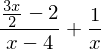

In [109]:
expr

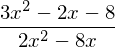

In [110]:
cancel(expr)


---

### apart() - Partial Fraction Decomposition

`apart()` simply performs a partial fraction decomposition on a rational function.

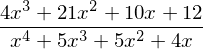

In [112]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x); expr

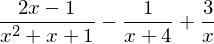

In [113]:
apart(expr)

----


## Trigonometric Simplification

N.B. Remember that the Python's convention for inverse trig equations is `acos()`, `asin()` etc..

In [114]:
acos(x)

In [115]:
cos(acos(x))

---

### trigsimp()

`trigsimp()` is used to simplify expressions based on trigonometric identities.

In [116]:
expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4; expr

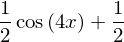

In [117]:
trigsimp(expr)

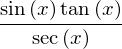

In [119]:
expr = sin(x)*tan(x)/sec(x); expr

In [120]:
trigsimp(expr)

In [121]:
expr = cosh(x)**2 + sinh(x)**2 ; expr

In [122]:
trigsimp(expr)

---

### expand_trig()

expand_trig() is used to expand trigonometric functions (apply the sum or double angle identities)

In [123]:
expr = sin(x+y); expr

In [124]:
expand_trig(expr)

In [127]:
expr = tan(2*x); expr

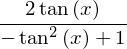

In [128]:
expand_trig(expr)


---

## Powers

There are identities for powers that hold under constraints. For example:

1. $x^a x^b = x^{a+b}$   -> holds always

2. x^a y^a = (xy)^a  -> holds when $x,y>0$ and $a\in R$

3. (x^a)^b = x^{ab}   -> holds when b is integer

### Symbols and requirements

For this reason when defining symbols we can put specific requirements as their arguments.
For example we define for this section:

In [129]:
x, y = symbols('x y', positive=True)

In [130]:
a,b = symbols('a b', real=True)

In [131]:
z, t, c = symbols('z t c ')



---

### powsimp()

`powsimp()` is used to simplify an expression with powers (using identities 1,2)

In [133]:
expr = (x**a)*(x**b); expr

In [134]:
powsimp(expr)

To force a simplification without messing with the assumptions, while 

In [136]:
powsimp(t**c*z**c)

forcing it with an argument

In [137]:
powsimp(t**c*z**c, force=True)

---

### expand_power_exp() and expand_power_base()

`expand_power_exp()` and `expand_power_base()` applies the identities 1,2 from right to left, expanding the exponent or the base of an expression

In [138]:
expr = x**(a+b); expr

In [139]:
expand_power_exp(expr)

In [140]:
expr = (x*y)**a; expr

In [141]:
expand_power_base(expr)

---

### powdenest()

This is to apply identity 3 on nested powers

In [144]:
expr = (x**a)**b; expr  # automatically is simplified

In [143]:
powdenest(expr)